In [35]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [36]:
os.getcwd()

'C:\\Users\\ridhi\\Desktop\\Analytics Practicum\\Datasets'

In [37]:
os.chdir('C:/Users/ridhi/Desktop/Analytics Practicum/Datasets')

In [38]:
os.getcwd()

'C:\\Users\\ridhi\\Desktop\\Analytics Practicum\\Datasets'

In [39]:
df1 = pd.read_excel('combined.xlsx')

---------------------------DATA CLEANING AND EXPLORATORY DATA ANALYSIS-------------------------

In [40]:
df1.head()

,IYR,IMO,RAILROAD,INCDTNO,TYPPERS,JOBCODE,NATINJ,LOCATION,IFATAL,OCCODE,...,TOOLS,INJCAUS,HZMEXPOS,TERMINAT,NARR1,NARR2,NARR3,COVERDATA,LATITUDE,LONGITUD
0,13,5,ARR,20130044,B,416,20,6,C,NaN,...,14,01,,,EMPLOYEE SLIPPED ON ICE AND FELL TO THE GROUND...,NaN,NaN,,0.000000,0.000000
1,13,5,ARR,20130048,A,421,30,5,D,NaN,...,56,03,,,"EMPLOYEE WAS STRUCK BY PRESSURIZED HOSE, SPLIT...",NaN,NaN,,0.000000,0.000000
2,13,5,ARR,20130053,A,300,10,3,B,NaN,...,38,09,,,A TRACK SPIKE BOUNCED UP AND HIT THE EMPLOYEE ...,NaN,NaN,,0.000000,0.000000
3,13,3,CSX,000113643,D,,99,9,,NaN,...,99,08,N,N,LOCATION: GYM. TOOLS/MACHINERY: SITTING IN BIO...,NaN,NaN,,30.359293,-81.716812
4,13,3,CSX,000114087,E,,99,9,,NaN,...,82,10,N,N,NaN,NaN,NaN,,30.570492,-87.289435


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 50 columns):
IYR          57457 non-null int64
IMO          57457 non-null int64
RAILROAD     57457 non-null object
INCDTNO      57457 non-null object
TYPPERS      57457 non-null object
JOBCODE      57457 non-null object
NATINJ       57457 non-null object
LOCATION     57457 non-null object
IFATAL       57457 non-null object
OCCODE       0 non-null float64
TCODE        0 non-null float64
AGE          53312 non-null float64
DAYSABS      57457 non-null int64
DAYSRES      57457 non-null int64
DUMMY        0 non-null float64
STATE        57457 non-null int64
TYPRR        57363 non-null float64
DUMMY1       0 non-null float64
REGION       57457 non-null int64
DUMMY2       0 non-null float64
NARRLEN      57457 non-null int64
CASFATAL     57457 non-null object
CAS57        57457 non-null object
CAS54        57457 non-null object
DUMMY3       0 non-null float64
DAY          57457 non-null int64
YEAR4 

DATA CLEANING

In [42]:
#Dropping variables which have all null values and making a new dataframe df3

df3 = df1.drop(['OCCODE','TCODE','DUMMY','DUMMY1','DUMMY2','DUMMY3'], axis=1)
#df1.drop('TCODE', axis=1)
#df1.drop('DUMMY', axis=1)
#df1.drop('DUMMY1', axis=1)
#df1.drop('DUMMY2', axis=1)
#df1.drop('DUMMY3', axis=1)

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 44 columns):
IYR          57457 non-null int64
IMO          57457 non-null int64
RAILROAD     57457 non-null object
INCDTNO      57457 non-null object
TYPPERS      57457 non-null object
JOBCODE      57457 non-null object
NATINJ       57457 non-null object
LOCATION     57457 non-null object
IFATAL       57457 non-null object
AGE          53312 non-null float64
DAYSABS      57457 non-null int64
DAYSRES      57457 non-null int64
STATE        57457 non-null int64
TYPRR        57363 non-null float64
REGION       57457 non-null int64
NARRLEN      57457 non-null int64
CASFATAL     57457 non-null object
CAS57        57457 non-null object
CAS54        57457 non-null object
DAY          57457 non-null int64
YEAR4        57457 non-null int64
TIMEHR       57457 non-null int64
TIMEMIN      57457 non-null int64
AMPM         57457 non-null object
COUNTY       57457 non-null object
CNTYCD       57457 non-nul

In [44]:
df3

,IYR,IMO,RAILROAD,INCDTNO,TYPPERS,JOBCODE,NATINJ,LOCATION,IFATAL,AGE,...,TOOLS,INJCAUS,HZMEXPOS,TERMINAT,NARR1,NARR2,NARR3,COVERDATA,LATITUDE,LONGITUD
0,13,5,ARR,20130044,B,416,20,6,C,56.0,...,14,01,,,EMPLOYEE SLIPPED ON ICE AND FELL TO THE GROUND...,NaN,NaN,,0.000000,0.000000
1,13,5,ARR,20130048,A,421,30,5,D,35.0,...,56,03,,,"EMPLOYEE WAS STRUCK BY PRESSURIZED HOSE, SPLIT...",NaN,NaN,,0.000000,0.000000
2,13,5,ARR,20130053,A,300,10,3,B,45.0,...,38,09,,,A TRACK SPIKE BOUNCED UP AND HIT THE EMPLOYEE ...,NaN,NaN,,0.000000,0.000000
3,13,3,CSX,000113643,D,,99,9,,NaN,...,99,08,N,N,LOCATION: GYM. TOOLS/MACHINERY: SITTING IN BIO...,NaN,NaN,,30.359293,-81.716812
4,13,3,CSX,000114087,E,,99,9,,56.0,...,82,10,N,N,NaN,NaN,NaN,,30.570492,-87.289435
5,13,12,ATK,131182,C,,10,1,C,NaN,...,11,09,N,,NaN,NaN,NaN,,0.000000,0.000000
6,13,12,ATK,131284,D,,10,5,J,68.0,...,11,09,N,,NaN,NaN,NaN,,0.000000,0.000000
7,13,9,FEC,I21092513,G,,70,3,G,29.0,...,81,09,,,CONTRACTOR WAS USING AN AIR COMPRESSOR CLEANIN...,LED OVER STRIKING THE CONTRACTORS RIGHT FOOT. ...,NaN,,0.000000,0.000000
8,13,3,SFRV,030613,C,,20,3,D,57.0,...,99,99,,,PASSENGER TWISTED HER ANKLE AND FELL WHILE WAL...,SPONDED AND TRANSPORTED HER TO A MEDICAL FACIL...,NaN,,0.000000,0.000000
9,13,9,FEC,T13092313,E,,80,1,F,35.0,...,99,10,,,TRESPASSER WAS WALKING NORTH WHILE TRAIN WAS H...,"HIS HANDS TO BREAK HIS FALL, HIS RIGHT HAND WA...",NGERS. HE ALSO HAD A LACERATION TO BACK OF HEAD.,,26.472715,-80.068257


In [45]:
df3.AGE[(df3['TYPPERS']== 'B')].mode()
df3.AGE[(df3['TYPPERS']== 'A')].mode()
df3.AGE[(df3['TYPPERS']== 'D')].mode()
df3.AGE[(df3['TYPPERS']== 'E')].mode()
df3.AGE[(df3['TYPPERS']== 'C')].mode()
df3.AGE[(df3['TYPPERS']== 'G')].mode()
df3.AGE[(df3['TYPPERS']== 'F')].mode()
df3.AGE[(df3['TYPPERS']== 'J')].mode()
df3.AGE[(df3['TYPPERS']== 'H')].mode()
df3.AGE[(df3['TYPPERS']== 'I')].mode()

0    40.0
1    53.0
2    64.0
3    65.0
4    70.0
5    71.0
dtype: float64

In [46]:
#It looks like there are some attributes which have missing values. 
#Let's try to deal with those. Let's start with AGE. We can fill in 
#the AGE missing values with the mode of each AGE from a category 
#of TYPPERS
from scipy import stats

TYPPERS = ['B','A','D','E','C','G','F','J','H','I']
item1=[]
item2=[]
for i in TYPPERS:
    item = (stats.mode(df3.AGE[(df3['TYPPERS']== i)]))
    item1 = int(item[0][0])
    #print(item1)
    #print(item[0])
    #item1 = item.concatenate(item)
    #for j in item:
    #start = item1.find('[') + 2
    #end = item1.find('.]', start)
    #item1[start:end]
    #item2 = item1.append(item1)
    item2.append((item1))
    
item2


[50, 44, 40, 30, 63, 40, 30, 54, 57, 40]

In [47]:
##IDEA - 1

#from scipy import stats

#TYPPERS = ['B','A','D','E','C','G','F','J','H','I']
#item1=[]
#for i in TYPPERS:
 #   item = (stats.mode(df3.AGE[(df3['TYPPERS']== i)]))
    
#item[0][0]

##############################################################
##IDEA - 2

#TYPPERS = ['B','A','D','E','C','G','F','J','H','I']
#for i in TYPPERS:
 #   print(stats.mode(dftry.AGE[(dftry['TYPPERS']== i)]))
    

##############################################################
##IDEA - 3
#list1 = [1, 2, 3, 4, 5]
#list2 = [123, 234, 456]
#d = {'a': [], 'b': []}
#d['a'].append(list1)
#d['a'].append(list2)
#print (d['a'])


#############################################################
##IDEA - 4
#typpersdict = {}
#while True:
#    for l in TYPPERS:
 #       k = l
 #       break
  #  for m in item2:    
   #     val = m
   #     break
    #typpersdict[k] = val

In [48]:
typpersdict ={}


jkj = [0,1,2,3,4,5,6,7,8,9]
for z in jkj:
    typpersdict.update( {TYPPERS[z]: item2[z]} )

    
typpersdict

{'B': 50,
 'A': 44,
 'D': 40,
 'E': 30,
 'C': 63,
 'G': 40,
 'F': 30,
 'J': 54,
 'H': 57,
 'I': 40}

In [49]:
df3[['TYPPERS','AGE']]

,TYPPERS,AGE
0,B,56.0
1,A,35.0
2,A,45.0
3,D,NaN
4,E,56.0
5,C,NaN
6,D,68.0
7,G,29.0
8,C,57.0
9,E,35.0


In [50]:
df3['AGE1'] = df3['TYPPERS'].map(typpersdict)   

In [51]:
df3[['TYPPERS','AGE','AGE1']]

,TYPPERS,AGE,AGE1
0,B,56.0,50
1,A,35.0,44
2,A,45.0,44
3,D,NaN,40
4,E,56.0,30
5,C,NaN,63
6,D,68.0,40
7,G,29.0,40
8,C,57.0,63
9,E,35.0,30


In [52]:
df3.AGE.fillna(df3.AGE1, inplace=True)
del df3['AGE1']
#df.columns = 'File heat Observations'.split()

In [53]:
df3[['TYPPERS','AGE']]

,TYPPERS,AGE
0,B,56.0
1,A,35.0
2,A,45.0
3,D,40.0
4,E,56.0
5,C,63.0
6,D,68.0
7,G,29.0
8,C,57.0
9,E,35.0


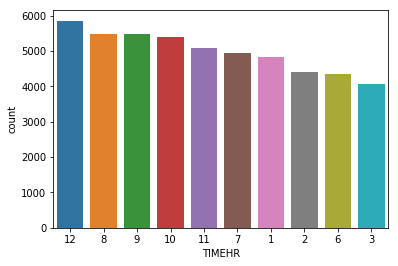

In [54]:
sns.countplot(x = 'TIMEHR',
              data = df3,
              order = df3['TIMEHR'].value_counts()[:10].index)
plt.show()

In [55]:
#Trying to turn the TIMEHR into military time..

#if ((df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 1)):
 #   df3['TIMEFINAL'] = 13

####################################################

def fx(x):
    if ((df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 1)):
        return 13

print(df3)
df3['TIMEFIN'] = df3.A.apply(fx)
print(df3['TIMEFIN'])

      IYR  IMO RAILROAD     INCDTNO TYPPERS JOBCODE NATINJ LOCATION IFATAL  \
0      13    5     ARR   20130044         B     416     20        6      C   
1      13    5     ARR   20130048         A     421     30        5      D   
2      13    5     ARR   20130053         A     300     10        3      B   
3      13    3     CSX   000113643        D             99        9          
4      13    3     CSX   000114087        E             99        9          
5      13   12     ATK   131182           C             10        1      C   
6      13   12     ATK   131284           D             10        5      J   
7      13    9     FEC   I21092513        G             70        3      G   
8      13    3     SFRV  030613           C             20        3      D   
9      13    9     FEC   T13092313        E             80        1      F   
10     13   10     CFRC  13295            F     310     20        3      D   
11     13   12     ATK   131329           A     516     20      

AttributeError: 'DataFrame' object has no attribute 'A'

In [56]:
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 1), 'TIMEFINALS'] = 1
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 2), 'TIMEFINALS'] = 2
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 3), 'TIMEFINALS'] = 3
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 4), 'TIMEFINALS'] = 4
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 5), 'TIMEFINALS'] = 5
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 6), 'TIMEFINALS'] = 6
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 7), 'TIMEFINALS'] = 7
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 8), 'TIMEFINALS'] = 8
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 9), 'TIMEFINALS'] = 9
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 10), 'TIMEFINALS'] = 10
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 11), 'TIMEFINALS'] = 11
df3.loc[(df3['AMPM'] == 'AM') & (df3['TIMEHR'] == 12), 'TIMEFINALS'] = 12
######################
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 1), 'TIMEFINALS'] = 13
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 2), 'TIMEFINALS'] = 14
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 3), 'TIMEFINALS'] = 15
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 4), 'TIMEFINALS'] = 16
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 5), 'TIMEFINALS'] = 17
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 6), 'TIMEFINALS'] = 18
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 7), 'TIMEFINALS'] = 19
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 8), 'TIMEFINALS'] = 20
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 9), 'TIMEFINALS'] = 21
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 10), 'TIMEFINALS'] = 22
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 11), 'TIMEFINALS'] = 23
df3.loc[(df3['AMPM'] == 'PM') & (df3['TIMEHR'] == 12), 'TIMEFINALS'] = 0
#df3.loc[df['A'] > df['B'], 'C'] = 1
#df.loc[df['A'] < df['B'], 'C'] = -1


In [57]:
df3[['TIMEHR','AMPM','TIMEFINALS']]

,TIMEHR,AMPM,TIMEFINALS
0,6,AM,6.0
1,3,PM,15.0
2,3,PM,15.0
3,12,PM,0.0
4,4,PM,16.0
5,11,AM,11.0
6,4,PM,16.0
7,10,AM,10.0
8,8,AM,8.0
9,1,AM,1.0


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 45 columns):
IYR           57457 non-null int64
IMO           57457 non-null int64
RAILROAD      57457 non-null object
INCDTNO       57457 non-null object
TYPPERS       57457 non-null object
JOBCODE       57457 non-null object
NATINJ        57457 non-null object
LOCATION      57457 non-null object
IFATAL        57457 non-null object
AGE           57457 non-null float64
DAYSABS       57457 non-null int64
DAYSRES       57457 non-null int64
STATE         57457 non-null int64
TYPRR         57363 non-null float64
REGION        57457 non-null int64
NARRLEN       57457 non-null int64
CASFATAL      57457 non-null object
CAS57         57457 non-null object
CAS54         57457 non-null object
DAY           57457 non-null int64
YEAR4         57457 non-null int64
TIMEHR        57457 non-null int64
TIMEMIN       57457 non-null int64
AMPM          57457 non-null object
COUNTY        57457 non-null object
C

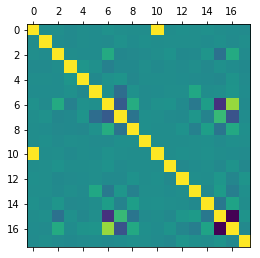

In [59]:
plt.matshow(df3.corr())
plt.show()

In [ ]:
sns.pairplot(df3)
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

In [ ]:
# with regression
sns.pairplot(df3, kind="reg")
plt.show()


In [ ]:
 
# without regression
sns.pairplot(df3, kind="scatter")
plt.show()

In [ ]:
df3['LOCATION']

In [ ]:
df3.info()

In [ ]:
df3 = df3.drop(['YEAR4','CNTYCD','STCNTY'], axis=1)

In [ ]:
df3.info()

In [42]:
# Let's concatenate the NARR1,NARR2 and NARR3 variables into one 
# such as NARRATION and then remove that NARRATION variable.

df3['NARRATION1'] = df3['NARR1'].str.cat(df3['NARR2'],sep="")

In [43]:
df3['NARRATION1'][12]

12    CONTRACTOR WAS DIGGING WITH A HAND SHOVEL  TRY...
12                                                  NaN
12                                                  NaN
12                                                  NaN
12    EMPLOYEE WAS ENGAGED IN CHIPPING ICE FROM A SW...
12                                                  NaN
Name: NARRATION1, dtype: object

In [45]:
df3["NARR2"].fillna(" ", inplace = True) 

In [46]:
df3["NARR3"].fillna(" ", inplace = True) 

In [47]:
df3['NARRATION'] = df3['NARRATION1'].str.cat(df3['NARR3'],sep="")

In [48]:
df3['NARRATION'][0]

0                                                  NaN
0                                                  NaN
0    EMPLOYEE WAS CHANGING BATTERIES IN A LOCOMOTIV...
0                                                  NaN
0    ABOUT 30 MINUTES AFTER TRAIN HAD LEFT THE STAT...
0                                                  NaN
Name: NARRATION, dtype: object

In [ ]:
df3['NARRATION'].to_excel("narr.xlsx") 

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 44 columns):
IYR           57457 non-null int64
IMO           57457 non-null int64
RAILROAD      57457 non-null object
INCDTNO       57457 non-null object
TYPPERS       57457 non-null object
JOBCODE       57457 non-null object
NATINJ        57457 non-null object
LOCATION      57457 non-null object
IFATAL        57457 non-null object
AGE           57457 non-null float64
DAYSABS       57457 non-null int64
DAYSRES       57457 non-null int64
STATE         57457 non-null int64
TYPRR         57363 non-null float64
REGION        57457 non-null int64
NARRLEN       57457 non-null int64
CASFATAL      57457 non-null object
CAS57         57457 non-null object
CAS54         57457 non-null object
DAY           57457 non-null int64
TIMEHR        57457 non-null int64
TIMEMIN       57457 non-null int64
AMPM          57457 non-null object
COUNTY        57457 non-null object
ALCOHOL       57457 non-null object


In [60]:
# From the above analysis with the info() function, the entire dataset seems fairly full with respect 
# to the attributes. It shows there aren't many null values. But, some are always hidden as blank spaces. Let's turn all the 
# blank spaces into NaN values. Let's replace fields that have only space (or empty) with NaN
df4 = df3.replace(r'^\s*$', np.nan, regex=True)

In [61]:
df4

,IYR,IMO,RAILROAD,INCDTNO,TYPPERS,JOBCODE,NATINJ,LOCATION,IFATAL,AGE,...,TERMINAT,NARR1,NARR2,NARR3,COVERDATA,LATITUDE,LONGITUD,TIMEFINALS,NARRATION1,NARRATION
0,13,5,ARR,20130044,B,416,20,6,C,56.0,...,NaN,EMPLOYEE SLIPPED ON ICE AND FELL TO THE GROUND...,NaN,NaN,NaN,0.000000,0.000000,6.0,NaN,NaN
1,13,5,ARR,20130048,A,421,30,5,D,35.0,...,NaN,"EMPLOYEE WAS STRUCK BY PRESSURIZED HOSE, SPLIT...",NaN,NaN,NaN,0.000000,0.000000,15.0,NaN,NaN
2,13,5,ARR,20130053,A,300,10,3,B,45.0,...,NaN,A TRACK SPIKE BOUNCED UP AND HIT THE EMPLOYEE ...,NaN,NaN,NaN,0.000000,0.000000,15.0,NaN,NaN
3,13,3,CSX,000113643,D,NaN,99,9,NaN,40.0,...,N,LOCATION: GYM. TOOLS/MACHINERY: SITTING IN BIO...,NaN,NaN,NaN,30.359293,-81.716812,0.0,NaN,NaN
4,13,3,CSX,000114087,E,NaN,99,9,NaN,56.0,...,N,NaN,NaN,NaN,NaN,30.570492,-87.289435,16.0,NaN,NaN
5,13,12,ATK,131182,C,NaN,10,1,C,63.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,11.0,NaN,NaN
6,13,12,ATK,131284,D,NaN,10,5,J,68.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,16.0,NaN,NaN
7,13,9,FEC,I21092513,G,NaN,70,3,G,29.0,...,NaN,CONTRACTOR WAS USING AN AIR COMPRESSOR CLEANIN...,LED OVER STRIKING THE CONTRACTORS RIGHT FOOT. ...,NaN,NaN,0.000000,0.000000,10.0,CONTRACTOR WAS USING AN AIR COMPRESSOR CLEANIN...,CONTRACTOR WAS USING AN AIR COMPRESSOR CLEANIN...
8,13,3,SFRV,030613,C,NaN,20,3,D,57.0,...,NaN,PASSENGER TWISTED HER ANKLE AND FELL WHILE WAL...,SPONDED AND TRANSPORTED HER TO A MEDICAL FACIL...,NaN,NaN,0.000000,0.000000,8.0,PASSENGER TWISTED HER ANKLE AND FELL WHILE WAL...,PASSENGER TWISTED HER ANKLE AND FELL WHILE WAL...
9,13,9,FEC,T13092313,E,NaN,80,1,F,35.0,...,NaN,TRESPASSER WAS WALKING NORTH WHILE TRAIN WAS H...,"HIS HANDS TO BREAK HIS FALL, HIS RIGHT HAND WA...",NGERS. HE ALSO HAD A LACERATION TO BACK OF HEAD.,NaN,26.472715,-80.068257,1.0,TRESPASSER WAS WALKING NORTH WHILE TRAIN WAS H...,TRESPASSER WAS WALKING NORTH WHILE TRAIN WAS H...


In [62]:
df4_withNarration = df4.drop(['NARRATION1','NARR1','NARR2','NARR3'], axis=1)

In [63]:
df4_withoutNarration = df4.drop(['NARRATION','NARR1','NARR2','NARR3','NARRATION1'], axis=1)

In [64]:
#Now, all of the blank values have turned into NaN. Let's go ahead and change all of these to 9999 before we export them
#into Excel.
df3_withNarration = df3_withNarration.fillna(9999)
df3_withNarration

,IYR,IMO,RAILROAD,INCDTNO,TYPPERS,JOBCODE,NATINJ,LOCATION,IFATAL,AGE,...,EVENT,TOOLS,INJCAUS,HZMEXPOS,TERMINAT,COVERDATA,LATITUDE,LONGITUD,TIMEFINALS,NARRATION
0,13,5,ARR,20130044,B,416,20,6,C,56.0,...,14,14,01,,,,0.000000,0.000000,6.0,9999
1,13,5,ARR,20130048,A,421,30,5,D,35.0,...,58,56,03,,,,0.000000,0.000000,15.0,9999
2,13,5,ARR,20130053,A,300,10,3,B,45.0,...,58,38,09,,,,0.000000,0.000000,15.0,9999
3,13,3,CSX,000113643,D,,99,9,,40.0,...,38,99,08,N,N,,30.359293,-81.716812,0.0,9999
4,13,3,CSX,000114087,E,,99,9,,56.0,...,32,82,10,N,N,,30.570492,-87.289435,16.0,9999
5,13,12,ATK,131182,C,,10,1,C,63.0,...,71,11,09,N,,,0.000000,0.000000,11.0,9999
6,13,12,ATK,131284,D,,10,5,J,68.0,...,70,11,09,N,,,0.000000,0.000000,16.0,9999
7,13,9,FEC,I21092513,G,,70,3,G,29.0,...,63,81,09,,,,0.000000,0.000000,10.0,CONTRACTOR WAS USING AN AIR COMPRESSOR CLEANIN...
8,13,3,SFRV,030613,C,,20,3,D,57.0,...,70,99,99,,,,0.000000,0.000000,8.0,PASSENGER TWISTED HER ANKLE AND FELL WHILE WAL...
9,13,9,FEC,T13092313,E,,80,1,F,35.0,...,70,99,10,,,,26.472715,-80.068257,1.0,TRESPASSER WAS WALKING NORTH WHILE TRAIN WAS H...


In [65]:
df4_withoutNarration = df4_withoutNarration.fillna(9999)
df4_withoutNarration

,IYR,IMO,RAILROAD,INCDTNO,TYPPERS,JOBCODE,NATINJ,LOCATION,IFATAL,AGE,...,LOCC,EVENT,TOOLS,INJCAUS,HZMEXPOS,TERMINAT,COVERDATA,LATITUDE,LONGITUD,TIMEFINALS
0,13,5,ARR,20130044,B,416,20,6,C,56.0,...,X9,14,14,01,9999,9999,9999,0.000000,0.000000,6.0
1,13,5,ARR,20130048,A,421,30,5,D,35.0,...,X9,58,56,03,9999,9999,9999,0.000000,0.000000,15.0
2,13,5,ARR,20130053,A,300,10,3,B,45.0,...,B7,58,38,09,9999,9999,9999,0.000000,0.000000,15.0
3,13,3,CSX,000113643,D,9999,99,9,9999,40.0,...,E2,38,99,08,N,N,9999,30.359293,-81.716812,0.0
4,13,3,CSX,000114087,E,9999,99,9,9999,56.0,...,B4,32,82,10,N,N,9999,30.570492,-87.289435,16.0
5,13,12,ATK,131182,C,9999,10,1,C,63.0,...,A7,71,11,09,N,9999,9999,0.000000,0.000000,11.0
6,13,12,ATK,131284,D,9999,10,5,J,68.0,...,A2,70,11,09,N,9999,9999,0.000000,0.000000,16.0
7,13,9,FEC,I21092513,G,9999,70,3,G,29.0,...,A3,63,81,09,9999,9999,9999,0.000000,0.000000,10.0
8,13,3,SFRV,030613,C,9999,20,3,D,57.0,...,A7,70,99,99,9999,9999,9999,0.000000,0.000000,8.0
9,13,9,FEC,T13092313,E,9999,80,1,F,35.0,...,A3,70,99,10,9999,9999,9999,26.472715,-80.068257,1.0


In [66]:
df4_withNarration.to_excel("combined_withnarration.xlsx") 

In [67]:
df4_withoutNarration.to_excel("combined_withoutnarration.xlsx") 

----------------------DATA MODELLING-----------------------------


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import os

In [2]:
os.getcwd()

'C:\\Users\\ridhi'

In [3]:
os.chdir('C:/Users/ridhi/Desktop/Analytics Practicum/Datasets')

In [4]:
df4_withoutNarration = pd.read_excel("combined_withoutnarration.xlsx")

In [5]:
df4_withoutNarration

,IYR,IMO,RAILROAD,INCDTNO,TYPPERS,JOBCODE,NATINJ,LOCATION,IFATAL,AGE,...,LOCC,EVENT,TOOLS,INJCAUS,HZMEXPOS,TERMINAT,COVERDATA,LATITUDE,LONGITUD,TIMEFINALS
0,13,5,ARR,20130044,B,416,20,6,C,56,...,X9,14,14,01,9999,9999,9999,0.000000,0.000000,6
1,13,5,ARR,20130048,A,421,30,5,D,35,...,X9,58,56,03,9999,9999,9999,0.000000,0.000000,15
2,13,5,ARR,20130053,A,300,10,3,B,45,...,B7,58,38,09,9999,9999,9999,0.000000,0.000000,15
3,13,3,CSX,000113643,D,9999,99,9,9999,40,...,E2,38,99,08,N,N,9999,30.359293,-81.716812,0
4,13,3,CSX,000114087,E,9999,99,9,9999,56,...,B4,32,82,10,N,N,9999,30.570492,-87.289435,16
5,13,12,ATK,131182,C,9999,10,1,C,63,...,A7,71,11,09,N,9999,9999,0.000000,0.000000,11
6,13,12,ATK,131284,D,9999,10,5,J,68,...,A2,70,11,09,N,9999,9999,0.000000,0.000000,16
7,13,9,FEC,I21092513,G,9999,70,3,G,29,...,A3,63,81,09,9999,9999,9999,0.000000,0.000000,10
8,13,3,SFRV,030613,C,9999,20,3,D,57,...,A7,70,99,99,9999,9999,9999,0.000000,0.000000,8
9,13,9,FEC,T13092313,E,9999,80,1,F,35,...,A3,70,99,10,9999,9999,9999,26.472715,-80.068257,1


In [6]:
df4_withoutNarration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 39 columns):
IYR           57457 non-null int64
IMO           57457 non-null int64
RAILROAD      57457 non-null object
INCDTNO       57457 non-null object
TYPPERS       57457 non-null object
JOBCODE       57457 non-null int64
NATINJ        57457 non-null object
LOCATION      57457 non-null object
IFATAL        57457 non-null object
AGE           57457 non-null int64
DAYSABS       57457 non-null int64
DAYSRES       57457 non-null int64
STATE         57457 non-null int64
TYPRR         57457 non-null int64
REGION        57457 non-null int64
NARRLEN       57457 non-null int64
CASFATAL      57457 non-null object
CAS57         57457 non-null object
CAS54         57457 non-null object
DAY           57457 non-null int64
TIMEHR        57457 non-null int64
TIMEMIN       57457 non-null int64
AMPM          57457 non-null object
COUNTY        57457 non-null object
ALCOHOL       57457 non-null int64
DRUG  

In [7]:
df4_withoutNarration['CASFATAL1'] = df4_withoutNarration['CASFATAL'].map({'Y': 1, 'N': 0})

In [8]:
df4_withoutNarration['CASFATAL1']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      1
29      0
       ..
9718    0
9719    0
9720    0
9721    0
9722    1
9723    0
9724    0
9725    1
9726    1
9727    0
9728    0
9729    0
9730    1
9731    1
9732    0
9733    0
9734    0
9735    1
9736    0
9737    0
9738    0
9739    1
9740    0
9741    0
9742    0
9743    0
9744    0
9745    0
9746    0
9747    0
Name: CASFATAL1, Length: 57457, dtype: int64

In [9]:
df4_withoutNarration['AMPMNUM'] = df4_withoutNarration['AMPM'].map({'AM': 0, 'PM': 1})

In [10]:
df4_withoutNarration['AMPMNUM']

0       0
1       1
2       1
3       1
4       1
5       0
6       1
7       0
8       0
9       0
10      1
11      1
12      0
13      0
14      1
15      0
16      1
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      1
28      1
29      0
       ..
9718    0
9719    1
9720    1
9721    1
9722    1
9723    1
9724    1
9725    1
9726    1
9727    0
9728    0
9729    1
9730    1
9731    1
9732    1
9733    1
9734    0
9735    1
9736    0
9737    1
9738    1
9739    0
9740    0
9741    1
9742    1
9743    1
9744    1
9745    1
9746    1
9747    0
Name: AMPMNUM, Length: 57457, dtype: int64

In [11]:
df4_withoutNarration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 41 columns):
IYR           57457 non-null int64
IMO           57457 non-null int64
RAILROAD      57457 non-null object
INCDTNO       57457 non-null object
TYPPERS       57457 non-null object
JOBCODE       57457 non-null int64
NATINJ        57457 non-null object
LOCATION      57457 non-null object
IFATAL        57457 non-null object
AGE           57457 non-null int64
DAYSABS       57457 non-null int64
DAYSRES       57457 non-null int64
STATE         57457 non-null int64
TYPRR         57457 non-null int64
REGION        57457 non-null int64
NARRLEN       57457 non-null int64
CASFATAL      57457 non-null object
CAS57         57457 non-null object
CAS54         57457 non-null object
DAY           57457 non-null int64
TIMEHR        57457 non-null int64
TIMEMIN       57457 non-null int64
AMPM          57457 non-null object
COUNTY        57457 non-null object
ALCOHOL       57457 non-null int64
DRUG  

In [12]:
df4_withoutNarration['RAILROAD'] = pd.Categorical(df4_withoutNarration['RAILROAD'])
df4_withoutNarration['TYPPERS'] = pd.Categorical(df4_withoutNarration['TYPPERS'])
df4_withoutNarration['NATINJ'] = pd.Categorical(df4_withoutNarration['NATINJ'])
df4_withoutNarration['COUNTY'] = pd.Categorical(df4_withoutNarration['COUNTY'])
df4_withoutNarration['PHYACT'] = pd.Categorical(df4_withoutNarration['PHYACT'])
df4_withoutNarration['TOOLS'] = pd.Categorical(df4_withoutNarration['TOOLS'])
df4_withoutNarration['INJCAUS'] = pd.Categorical(df4_withoutNarration['INJCAUS'])
df4_withoutNarration['HZMEXPOS'] = pd.Categorical(df4_withoutNarration['HZMEXPOS'])


In [13]:
df4_withoutNarration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 41 columns):
IYR           57457 non-null int64
IMO           57457 non-null int64
RAILROAD      57457 non-null category
INCDTNO       57457 non-null object
TYPPERS       57457 non-null category
JOBCODE       57457 non-null int64
NATINJ        57457 non-null category
LOCATION      57457 non-null object
IFATAL        57457 non-null object
AGE           57457 non-null int64
DAYSABS       57457 non-null int64
DAYSRES       57457 non-null int64
STATE         57457 non-null int64
TYPRR         57457 non-null int64
REGION        57457 non-null int64
NARRLEN       57457 non-null int64
CASFATAL      57457 non-null object
CAS57         57457 non-null object
CAS54         57457 non-null object
DAY           57457 non-null int64
TIMEHR        57457 non-null int64
TIMEMIN       57457 non-null int64
AMPM          57457 non-null object
COUNTY        57457 non-null category
ALCOHOL       57457 non-null int6

In [14]:
df4_withoutNarration_subb = df4_withoutNarration[['IYR','IMO','RAILROAD', 'TYPPERS', 'JOBCODE','AGE','DAYSABS','DAYSRES','STATE','REGION','DAY','TIMEHR','TIMEMIN', 'NATINJ', 'COUNTY','ALCOHOL','DRUG', 'PHYACT', 'INJCAUS','AMPMNUM','EVENT','TOOLS','TIMEFINALS','LATITUDE','LONGITUD','CASFATAL1']]

In [15]:
df4_withoutNarration_subb

,IYR,IMO,RAILROAD,TYPPERS,JOBCODE,AGE,DAYSABS,DAYSRES,STATE,REGION,...,DRUG,PHYACT,INJCAUS,AMPMNUM,EVENT,TOOLS,TIMEFINALS,LATITUDE,LONGITUD,CASFATAL1
0,13,5,ARR,B,416,56,153,8,2,8,...,9999,B5,01,0,14,14,6,0.000000,0.000000,0
1,13,5,ARR,A,421,35,2,0,2,8,...,9999,B2,03,1,58,56,15,0.000000,0.000000,0
2,13,5,ARR,A,300,45,35,0,2,8,...,9999,39,09,1,58,38,15,0.000000,0.000000,0
3,13,3,CSX,D,9999,40,0,0,12,3,...,9999,60,08,1,38,99,0,30.359293,-81.716812,0
4,13,3,CSX,E,9999,56,0,0,12,3,...,9999,21,10,1,32,82,16,30.570492,-87.289435,0
5,13,12,ATK,C,9999,63,0,0,12,3,...,9999,72,09,0,71,11,11,0.000000,0.000000,0
6,13,12,ATK,D,9999,68,0,0,12,3,...,9999,70,09,1,70,11,16,0.000000,0.000000,0
7,13,9,FEC,G,9999,29,0,0,12,3,...,9999,08,09,0,63,81,10,0.000000,0.000000,0
8,13,3,SFRV,C,9999,57,0,0,12,3,...,9999,64,99,0,70,99,8,0.000000,0.000000,0
9,13,9,FEC,E,9999,35,0,0,12,3,...,9999,72,10,0,70,99,1,26.472715,-80.068257,0


In [16]:
df4_withoutNarration_subb = pd.get_dummies(df4_withoutNarration_subb, drop_first=True)  # To avoid dummy trap
df4_withoutNarration_subb.head()

,IYR,IMO,JOBCODE,AGE,DAYSABS,DAYSRES,STATE,REGION,DAY,TIMEHR,...,TOOLS_86,TOOLS_87,TOOLS_88,TOOLS_89,TOOLS_8F,TOOLS_8K,TOOLS_8N,TOOLS_90,TOOLS_91,TOOLS_99
0,13,5,416,56,153,8,2,8,1,6,...,0,0,0,0,0,0,0,0,0,0
1,13,5,421,35,2,0,2,8,6,3,...,0,0,0,0,0,0,0,0,0,0
2,13,5,300,45,35,0,2,8,16,3,...,0,0,0,0,0,0,0,0,0,0
3,13,3,9999,40,0,0,12,3,1,12,...,0,0,0,0,0,0,0,0,0,1
4,13,3,9999,56,0,0,12,3,20,4,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df4_withoutNarration_subb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Columns: 2198 entries, IYR to TOOLS_99
dtypes: float64(2), int64(17), uint8(2179)
memory usage: 128.2 MB


In [ ]:
df4_withoutNarration_subb.to_excel("subb.xlsx") 

In [17]:
# Create data set to train data imputation methods
X = df4_withoutNarration_subb[df4_withoutNarration_subb.loc[:, df4_withoutNarration_subb.columns != 'CASFATAL1'].columns]
y = df4_withoutNarration_subb['CASFATAL1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [74]:
# Debug
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
       IYR  IMO  JOBCODE  AGE  DAYSABS  DAYSRES  STATE  REGION  DAY  TIMEHR  \
2465   15    6      606   58       45        0     17       4   30       8   
3788   16    5     9999   65        0        0     17       4   18      11   
8380   18   10     9999   67        0        0     42       2    1       8   
5671   17    3      614   32      180        0     13       3   31       7   
3970   16    1     9999   46        0        0     17       4   11       6   

        ...     TOOLS_86  TOOLS_87  TOOLS_88  TOOLS_89  TOOLS_8F  TOOLS_8K  \
2465    ...            0         0         0         0         0         0   
3788    ...            0         0         0         0         0         0   
8380    ...            0         0         0         0         0         0   
5671    ...            0         0         0         0         0         0   
3970    ...            0         0         0         0         0         0   

      TOOLS_8N  TOOLS_90  TOOLS_91  TOOLS_99  
2465 

In [17]:
#TRANSFORMING AND MAPPING ALL THE OBJECT variables:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# transform and map RAILROAD
rroad_le = LabelEncoder()
rroad_labels = rroad_le.fit_transform(df4_withoutNarration['RAILROAD'])
df4_withoutNarration['RAILROAD_label'] = rroad_labels


df4_withoutNarration_sub = df4_withoutNarration[['IYR','IMO', 'RAILROAD', 'RAILROAD_label']]
df4_withoutNarration_sub.iloc[0:10]



,IYR,IMO,RAILROAD,RAILROAD_label
0,13,5,ARR,20
1,13,5,ARR,20
2,13,5,ARR,20
3,13,3,CSX,106
4,13,3,CSX,106
5,13,12,ATK,24
6,13,12,ATK,24
7,13,9,FEC,155
8,13,3,SFRV,405
9,13,9,FEC,155


In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# transform and map TYPPERS
typp_le = LabelEncoder()
typp_labels = typp_le.fit_transform(df4_withoutNarration['TYPPERS'])
df4_withoutNarration['TYPPERS_label'] = typp_labels


In [19]:
df4_withoutNarration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 43 columns):
IYR               57457 non-null int64
IMO               57457 non-null int64
RAILROAD          57457 non-null category
INCDTNO           57457 non-null object
TYPPERS           57457 non-null category
JOBCODE           57457 non-null int64
NATINJ            57457 non-null category
LOCATION          57457 non-null object
IFATAL            57457 non-null object
AGE               57457 non-null int64
DAYSABS           57457 non-null int64
DAYSRES           57457 non-null int64
STATE             57457 non-null int64
TYPRR             57457 non-null int64
REGION            57457 non-null int64
NARRLEN           57457 non-null int64
CASFATAL          57457 non-null object
CAS57             57457 non-null object
CAS54             57457 non-null object
DAY               57457 non-null int64
TIMEHR            57457 non-null int64
TIMEMIN           57457 non-null int64
AMPM              5

In [16]:
df4_withoutNarration_1 = df4_withoutNarration

In [17]:
df4_withoutNarration_1 = df4_withoutNarration_1.astype(float)

ValueError: could not convert string to float: 'ARR '

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# transform and map NATINJ
ninj_le = LabelEncoder()
ninj_labels = ninj_le.fit_transform(df4_withoutNarration['NATINJ'])
df4_withoutNarration['NATINJ_label'] = ninj_labels

# transform and map LOCATION
##loc_le = LabelEncoder()
#loc_labels = loc_le.fit_transform(df4_withoutNarration['LOCATION'])
#df4_withoutNarration['LOCATION_label'] = loc_labels

# transform and map COUNTY
county_le = LabelEncoder()
county_labels = county_le.fit_transform(df4_withoutNarration['COUNTY'])
df4_withoutNarration['COUNTY_label'] = county_labels

# transform and map PHYACT
phyact_le = LabelEncoder()
phyact_labels = phyact_le.fit_transform(df4_withoutNarration['PHYACT'])
df4_withoutNarration['PHYACT_label'] = phyact_labels

# transform and map INJCAUS
injcaus_le = LabelEncoder()
injcaus_labels = injcaus_le.fit_transform(df4_withoutNarration['INJCAUS'])
df4_withoutNarration['INJCAUS_label'] = injcaus_labels

#'RAILROAD', 'RAILROAD_label',

In [21]:
# transform and map INJCAUS
tools_le = LabelEncoder()
tools_labels = tools_le.fit_transform(df4_withoutNarration['TOOLS'])
df4_withoutNarration['TOOLS_label'] = tools_labels

In [27]:
df4_withoutNarration_sub = df4_withoutNarration[['IYR','IMO','RAILROAD_label', 'TYPPERS_label', 'JOBCODE','AGE','DAYSABS','DAYSRES','STATE','REGION','DAY','TIMEHR','TIMEMIN', 'NATINJ_label', 'COUNTY_label','ALCOHOL','DRUG', 'PHYACT_label', 'INJCAUS_label','AMPMNUM','EVENT','TOOLS_label','TIMEFINALS','LATITUDE','LONGITUD','CASFATAL1']]
df4_withoutNarration_sub.iloc[0:10]


,IYR,IMO,RAILROAD_label,TYPPERS_label,JOBCODE,AGE,DAYSABS,DAYSRES,STATE,REGION,...,DRUG,PHYACT_label,INJCAUS_label,AMPMNUM,EVENT,TOOLS_label,TIMEFINALS,LATITUDE,LONGITUD,CASFATAL1
0,13,5,20,1,416,56,153,8,2,8,...,9999,92,0,0,14,13,6,0.000000,0.000000,0
1,13,5,20,0,421,35,2,0,2,8,...,9999,89,2,1,58,53,15,0.000000,0.000000,0
2,13,5,20,0,300,45,35,0,2,8,...,9999,37,8,1,58,39,15,0.000000,0.000000,0
3,13,3,106,3,9999,40,0,0,12,3,...,9999,58,7,1,38,91,0,30.359293,-81.716812,0
4,13,3,106,4,9999,56,0,0,12,3,...,9999,19,9,1,32,78,16,30.570492,-87.289435,0
5,13,12,24,2,9999,63,0,0,12,3,...,9999,69,8,0,71,10,11,0.000000,0.000000,0
6,13,12,24,3,9999,68,0,0,12,3,...,9999,67,8,1,70,10,16,0.000000,0.000000,0
7,13,9,155,6,9999,29,0,0,12,3,...,9999,7,8,0,63,77,10,0.000000,0.000000,0
8,13,3,405,2,9999,57,0,0,12,3,...,9999,62,40,0,70,91,8,0.000000,0.000000,0
9,13,9,155,4,9999,35,0,0,12,3,...,9999,69,9,0,70,91,1,26.472715,-80.068257,0


In [18]:
df4_withoutNarration_subb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Columns: 2198 entries, IYR to TOOLS_99
dtypes: float64(2), int64(17), uint8(2179)
memory usage: 128.2 MB


In [50]:
# Transform categorical variables into dummy variables
df4_withoutNarration_sub = pd.get_dummies(df4_withoutNarration_sub, drop_first=True)  # To avoid dummy trap
df4_withoutNarration_sub.head()

,IYR,IMO,RAILROAD_label,TYPPERS_label,JOBCODE,AGE,DAYSABS,DAYSRES,STATE,REGION,...,ALCOHOL,DRUG,PHYACT_label,INJCAUS_label,AMPMNUM,EVENT,TOOLS_label,TIMEFINALS,LATITUDE,LONGITUD
0,13,5,20,1,416,56,153,8,2,8,...,9999,9999,92,0,0,14,13,6,0.000000,0.000000
1,13,5,20,0,421,35,2,0,2,8,...,9999,9999,89,2,1,58,53,15,0.000000,0.000000
2,13,5,20,0,300,45,35,0,2,8,...,9999,9999,37,8,1,58,39,15,0.000000,0.000000
3,13,3,106,3,9999,40,0,0,12,3,...,9999,9999,58,7,1,38,91,0,30.359293,-81.716812
4,13,3,106,4,9999,56,0,0,12,3,...,9999,9999,19,9,1,32,78,16,30.570492,-87.289435


In [38]:
df4_withoutNarration_subb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Columns: 2198 entries, IYR to TOOLS_99
dtypes: float64(2), int64(17), uint8(2179)
memory usage: 128.2 MB


In [ ]:
df4_withoutNarration_1 = df4_withoutNarration['TYPPERS_label','NATINJ_label','']

In [20]:
#One hot encoding

# encode RAILROAD labels using one-hot encoding scheme
rroad_ohe = OneHotEncoder()
rroad_feature_arr = rroad_ohe.fit_transform(
                              df4_withoutNarration_sub[['RAILROAD_label']]).toarray()
rroad_feature_labels = list(rroad_le.classes_)
rroad_features = pd.DataFrame(rroad_feature_arr, 
                           columns=rroad_feature_labels)


# encode TYPPERS status labels using one-hot encoding scheme
#typp_ohe = OneHotEncoder()
#typp_feature_arr = typp_ohe.fit_transform(
 #                               df4_withoutNarration[['TYPPERS_label']]).toarray()
#typp_feature_labels = ['Legendary_'+str(cls_label) 
#                          for cls_label in typp_le.classes_]
#typp_features = pd.DataFrame(typp_feature_arr, 
 #                          columns=typp_feature_labels)

# encode NATINJ labels using one-hot encoding scheme
ninj_ohe = OneHotEncoder()
ninj_feature_arr = ninj_ohe.fit_transform(
                              df4_withoutNarration_sub[['NATINJ_label']]).toarray()
ninj_feature_labels = list(ninj_le.classes_)
ninj_features = pd.DataFrame(ninj_feature_arr, 
                            columns=ninj_feature_labels)

# encode COUNTY labels using one-hot encoding scheme
county_ohe = OneHotEncoder()
county_feature_arr = county_ohe.fit_transform(
                              df4_withoutNarration_sub[['COUNTY_label']]).toarray()
county_feature_labels = list(county_le.classes_)
county_features = pd.DataFrame(county_feature_arr, 
                            columns=county_feature_labels)

# encode PHYACT labels using one-hot encoding scheme
phyact_ohe = OneHotEncoder()
phyact_feature_arr = phyact_ohe.fit_transform(
                              df4_withoutNarration_sub[['PHYACT_label']]).toarray()
phyact_feature_labels = list(phyact_le.classes_)
phyact_features = pd.DataFrame(phyact_feature_arr, 
                            columns=phyact_feature_labels)

# encode INJCAUS labels using one-hot encoding scheme
injcaus_ohe = OneHotEncoder()
injcaus_feature_arr = injcaus_ohe.fit_transform(
                              df4_withoutNarration_sub[['INJCAUS_label']]).toarray()
injcaus_feature_labels = list(injcaus_le.classes_)
injcaus_features = pd.DataFrame(injcaus_feature_arr, 
                            columns=injcaus_feature_labels)

# encode NATINJ labels using one-hot encoding scheme

typp_ohe = OneHotEncoder()
typp_feature_arr = typp_ohe.fit_transform(
                             df4_withoutNarration_sub[['TYPPERS_label']]).toarray()
typp_feature_labels = list(typp_le.classes_)
typp_features = pd.DataFrame(typp_feature_arr, 
                           columns=typp_feature_labels)

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [44]:
rroad_ohe = OneHotEncoder()
rroad_feature_arr = rroad_ohe.fit_transform(
                              df4_withoutNarration[['RAILROAD']]).toarray()
rroad_feature_labels = list(rroad_le.classes_)
rroad_features = pd.DataFrame(rroad_feature_arr, 
                           columns=rroad_feature_labels)

In [40]:
# transform and map LOCATION
loc_le = LabelEncoder()
loc_labels = loc_le.fit_transform(df4_withoutNarration['LOCATION'])
df4_withoutNarration['LOCATION_label'] = loc_labels


TypeError: '<' not supported between instances of 'int' and 'str'

In [68]:
df4_withoutNarration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 47 columns):
IYR               57457 non-null int64
IMO               57457 non-null int64
RAILROAD          57457 non-null object
INCDTNO           57457 non-null object
TYPPERS           57457 non-null object
JOBCODE           57457 non-null int64
NATINJ            57457 non-null object
LOCATION          57457 non-null object
IFATAL            57457 non-null object
AGE               57457 non-null int64
DAYSABS           57457 non-null int64
DAYSRES           57457 non-null int64
STATE             57457 non-null int64
TYPRR             57457 non-null int64
REGION            57457 non-null int64
NARRLEN           57457 non-null int64
CASFATAL          57457 non-null object
CAS57             57457 non-null object
CAS54             57457 non-null object
DAY               57457 non-null int64
TIMEHR            57457 non-null int64
TIMEMIN           57457 non-null int64
AMPM              57457 n

In [21]:
df4_withoutNarration_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 25 columns):
IYR               57457 non-null int64
IMO               57457 non-null int64
RAILROAD_label    57457 non-null int32
TYPPERS_label     57457 non-null int32
JOBCODE           57457 non-null int64
AGE               57457 non-null int64
DAYSABS           57457 non-null int64
DAYSRES           57457 non-null int64
STATE             57457 non-null int64
REGION            57457 non-null int64
DAY               57457 non-null int64
TIMEHR            57457 non-null int64
TIMEMIN           57457 non-null int64
NATINJ_label      57457 non-null int32
COUNTY_label      57457 non-null int32
ALCOHOL           57457 non-null int64
DRUG              57457 non-null int64
PHYACT_label      57457 non-null int32
INJCAUS_label     57457 non-null int32
AMPMNUM           57457 non-null int64
EVENT             57457 non-null int64
TOOLS_label       57457 non-null int32
TIMEFINALS        57457 non-null i

In [34]:
#We dont want JOBCODE and JOBCODE label as they were already integers. 
#We only need objects
df4_withoutNarration_sub = df4_withoutNarration_sub.drop(['JOBCODE_label','JOBCODE'], axis=1)

In [21]:
df4_withoutNarration_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 25 columns):
IYR               57457 non-null int64
IMO               57457 non-null int64
RAILROAD_label    57457 non-null int32
TYPPERS_label     57457 non-null int32
JOBCODE           57457 non-null int64
AGE               57457 non-null int64
DAYSABS           57457 non-null int64
DAYSRES           57457 non-null int64
STATE             57457 non-null int64
REGION            57457 non-null int64
DAY               57457 non-null int64
TIMEHR            57457 non-null int64
TIMEMIN           57457 non-null int64
NATINJ_label      57457 non-null int32
COUNTY_label      57457 non-null int32
ALCOHOL           57457 non-null int64
DRUG              57457 non-null int64
PHYACT_label      57457 non-null int32
INJCAUS_label     57457 non-null int32
AMPMNUM           57457 non-null int64
EVENT             57457 non-null int64
TOOLS_label       57457 non-null int32
TIMEFINALS        57457 non-null i

In [ ]:
##ONE HOTE ENCODING
# encode generation labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(
                              poke_df[['Gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, 
                            columns=gen_feature_labels)
# encode legendary status labels using one-hot encoding scheme
leg_ohe = OneHotEncoder()
leg_feature_arr = leg_ohe.fit_transform(
                                poke_df[['Lgnd_Label']]).toarray()
leg_feature_labels = ['Legendary_'+str(cls_label) 
                           for cls_label in leg_le.classes_]
leg_features = pd.DataFrame(leg_feature_arr, 
                            columns=leg_feature_labels)

In [69]:
## One hot encoding
# encode generation labels using one-hot encoding scheme
typ_ohe = OneHotEncoder()
typ_feature_arr = typ_ohe.fit_transform(
                              df4_withoutNarration[['TYPPERS']]).toarray()
typ_feature_labels = list(typ_le.classes_)
typ_features = pd.DataFrame(typ_feature_arr, 
                            columns=typ_feature_labels)


NameError: name 'typ_le' is not defined

In [22]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df4_withoutNarration_sub.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plot.show()

NameError: name 'plt' is not defined

In [21]:
#Correlation with output variable
cor_target = abs(cor['CASFATAL'])


NameError: name 'cor' is not defined

In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [13]:
df4_withoutNarration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 41 columns):
IYR           57457 non-null int64
IMO           57457 non-null int64
RAILROAD      57457 non-null object
INCDTNO       57457 non-null object
TYPPERS       57457 non-null object
JOBCODE       57457 non-null int64
NATINJ        57457 non-null object
LOCATION      57457 non-null object
IFATAL        57457 non-null object
AGE           57457 non-null int64
DAYSABS       57457 non-null int64
DAYSRES       57457 non-null int64
STATE         57457 non-null int64
TYPRR         57457 non-null int64
REGION        57457 non-null int64
NARRLEN       57457 non-null int64
CASFATAL      57457 non-null object
CAS57         57457 non-null object
CAS54         57457 non-null object
DAY           57457 non-null int64
TIMEHR        57457 non-null int64
TIMEMIN       57457 non-null int64
AMPM          57457 non-null object
COUNTY        57457 non-null object
ALCOHOL       57457 non-null int64
DRUG  

DUMMY VARIABLES

In [20]:
df4_withoutNarration = df4_withoutNarration.drop(['RAILROAD','INCDTNO'],axis=1)

In [21]:
# Create a set of dummy variables from the RAILROAD variable
#df_rroad = pd.get_dummies(df4_withoutNarration['RAILROAD'])
#df_new1 = pd.concat([df4_withoutNarration, df_rroad], axis=1)
#df_new1

# Create a set of dummy variables from the RAILROAD variable
df_typpers = pd.get_dummies(df4_withoutNarration['TYPPERS'])
df_new2 = pd.concat([df4_withoutNarration, df_typpers], axis=1)
df_new2

# Create a set of dummy variables from the RAILROAD variable
df_natinj = pd.get_dummies(df4_withoutNarration['NATINJ'])
df_new3 = pd.concat([df_new2, df_natinj], axis=1)
df_new3

# Create a set of dummy variables from the RAILROAD variable
df_location = pd.get_dummies(df4_withoutNarration['LOCATION'])
df_new4 = pd.concat([df_new3, df_location], axis=1)
df_new4

# Create a set of dummy variables from the RAILROAD variable
df_state = pd.get_dummies(df4_withoutNarration['STATE'])
df_new5 = pd.concat([df_new4, df_state], axis=1)
df_new5

# Create a set of dummy variables from the RAILROAD variable
df_region = pd.get_dummies(df4_withoutNarration['REGION'])
df_new6 = pd.concat([df_new5, df_region], axis=1)
df_new6

# Create a set of dummy variables from the RAILROAD variable
df_county = pd.get_dummies(df4_withoutNarration['COUNTY'])
df_new7 = pd.concat([df_new6, df_county], axis=1)
df_new7

# Create a set of dummy variables from the RAILROAD variable
df_injcaus= pd.get_dummies(df4_withoutNarration['INJCAUS'])
df_new8 = pd.concat([df_new7, df_injcaus], axis=1)
df_new8

# Create a set of dummy variables from the RAILROAD variable
df_phyact = pd.get_dummies(df4_withoutNarration['PHYACT'])
df_new9 = pd.concat([df_new8, df_phyact], axis=1)
df_new9

# Create a set of dummy variables from the RAILROAD variable
df_tools = pd.get_dummies(df4_withoutNarration['TOOLS'])
df_new10 = pd.concat([df_new9, df_tools], axis=1)
df_new10

,IYR,IMO,TYPPERS,JOBCODE,NATINJ,LOCATION,IFATAL,AGE,DAYSABS,DAYSRES,...,86,87,88,89,8F,8K,8N,90,91,99
0,13,5,B,416,20,6,C,56,153,8,...,0,0,0,0,0,0,0,0,0,0
1,13,5,A,421,30,5,D,35,2,0,...,0,0,0,0,0,0,0,0,0,0
2,13,5,A,300,10,3,B,45,35,0,...,0,0,0,0,0,0,0,0,0,0
3,13,3,D,9999,99,9,9999,40,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13,3,E,9999,99,9,9999,56,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,12,C,9999,10,1,C,63,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13,12,D,9999,10,5,J,68,0,0,...,0,0,0,0,0,0,0,0,0,0
7,13,9,G,9999,70,3,G,29,0,0,...,0,0,0,0,0,0,0,0,0,0
8,13,3,C,9999,20,3,D,57,0,0,...,0,0,0,0,0,0,0,0,0,1
9,13,9,E,9999,80,1,F,35,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df_new1

NameError: name 'df_new1' is not defined

In [22]:
df_new10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Columns: 1790 entries, IYR to 99
dtypes: float64(2), int64(20), object(17), uint8(1751)
memory usage: 113.5+ MB


In [22]:
df4_withoutNarration_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 25 columns):
IYR               57457 non-null int64
IMO               57457 non-null int64
RAILROAD_label    57457 non-null int32
TYPPERS_label     57457 non-null int32
JOBCODE           57457 non-null int64
AGE               57457 non-null int64
DAYSABS           57457 non-null int64
DAYSRES           57457 non-null int64
STATE             57457 non-null int64
REGION            57457 non-null int64
DAY               57457 non-null int64
TIMEHR            57457 non-null int64
TIMEMIN           57457 non-null int64
NATINJ_label      57457 non-null int32
COUNTY_label      57457 non-null int32
ALCOHOL           57457 non-null int64
DRUG              57457 non-null int64
PHYACT_label      57457 non-null int32
INJCAUS_label     57457 non-null int32
AMPMNUM           57457 non-null int64
EVENT             57457 non-null int64
TOOLS_label       57457 non-null int32
TIMEFINALS        57457 non-null i

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Features
X = df4_withoutNarration_subb[df4_withoutNarration_subb.loc[:, df4_withoutNarration_subb.columns != 'CASFATAL1'].columns]
X



,IYR,IMO,JOBCODE,AGE,DAYSABS,DAYSRES,STATE,REGION,DAY,TIMEHR,...,TOOLS_86,TOOLS_87,TOOLS_88,TOOLS_89,TOOLS_8F,TOOLS_8K,TOOLS_8N,TOOLS_90,TOOLS_91,TOOLS_99
0,13,5,416,56,153,8,2,8,1,6,...,0,0,0,0,0,0,0,0,0,0
1,13,5,421,35,2,0,2,8,6,3,...,0,0,0,0,0,0,0,0,0,0
2,13,5,300,45,35,0,2,8,16,3,...,0,0,0,0,0,0,0,0,0,0
3,13,3,9999,40,0,0,12,3,1,12,...,0,0,0,0,0,0,0,0,0,1
4,13,3,9999,56,0,0,12,3,20,4,...,0,0,0,0,0,0,0,0,0,0
5,13,12,9999,63,0,0,12,3,30,11,...,0,0,0,0,0,0,0,0,0,0
6,13,12,9999,68,0,0,12,3,26,4,...,0,0,0,0,0,0,0,0,0,0
7,13,9,9999,29,0,0,12,3,25,10,...,0,0,0,0,0,0,0,0,0,0
8,13,3,9999,57,0,0,12,3,6,8,...,0,0,0,0,0,0,0,0,0,1
9,13,9,9999,35,0,0,12,3,23,1,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df4_withoutNarration_subb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Columns: 2198 entries, IYR to TOOLS_99
dtypes: float64(2), int64(17), uint8(2179)
memory usage: 128.2 MB


In [25]:
#df_new10.to_excel("df_new10.xlsx") 

In [24]:
df4_withoutNarration_sub['CASFATAL1']

KeyError: 'CASFATAL1'

In [30]:
df4_withoutNarration_sub.info()
#df_new10 = df_new10.drop('RAILROAD_label', axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 26 columns):
IYR               57457 non-null int64
IMO               57457 non-null int64
RAILROAD_label    57457 non-null int32
TYPPERS_label     57457 non-null int32
JOBCODE           57457 non-null int64
AGE               57457 non-null int64
DAYSABS           57457 non-null int64
DAYSRES           57457 non-null int64
STATE             57457 non-null int64
REGION            57457 non-null int64
DAY               57457 non-null int64
TIMEHR            57457 non-null int64
TIMEMIN           57457 non-null int64
NATINJ_label      57457 non-null int32
COUNTY_label      57457 non-null int32
ALCOHOL           57457 non-null int64
DRUG              57457 non-null int64
PHYACT_label      57457 non-null int32
INJCAUS_label     57457 non-null int32
AMPMNUM           57457 non-null int64
EVENT             57457 non-null int64
TOOLS_label       57457 non-null int32
TIMEFINALS        57457 non-null i

In [20]:
y=df4_withoutNarration_subb['CASFATAL1']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Done")

Done


In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995359090381715


In [104]:
from sklearn.metrics import r2_score
from rfpimp import *
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

ModuleNotFoundError: No module named 'rfpimp'

In [100]:
np.random.seed(seed = 42)
X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [101]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_valid, y_valid)))


R^2 Training Score: 1.00 
OOB Score: 1.00 
R^2 Validation Score: 1.00


In [43]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
from sklearn import datasets
print(df4_withoutNarration_subb.feature_names)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [45]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=df4_withoutNarration_sub.feature_names).sort_values(ascending=False)
feature_imp

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [ ]:
df_new10.info()

In [29]:
df4_withoutNarration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57457 entries, 0 to 9747
Data columns (total 45 columns):
IYR              57457 non-null int64
IMO              57457 non-null int64
INCDTNO          57457 non-null object
TYPPERS          57457 non-null object
JOBCODE          57457 non-null int64
NATINJ           57457 non-null object
LOCATION         57457 non-null object
IFATAL           57457 non-null object
AGE              57457 non-null int64
DAYSABS          57457 non-null int64
DAYSRES          57457 non-null int64
STATE            57457 non-null int64
TYPRR            57457 non-null int64
REGION           57457 non-null int64
NARRLEN          57457 non-null int64
CASFATAL         57457 non-null object
CAS57            57457 non-null object
CAS54            57457 non-null object
DAY              57457 non-null int64
TIMEHR           57457 non-null int64
TIMEMIN          57457 non-null int64
AMPM             57457 non-null object
COUNTY           57457 non-null object
ALCOHOL 